In [1]:
from tabulate import tabulate
import sys
import matplotlib.pyplot as plt
import sympy as sp
x = sp.symbols('x')



In [6]:
def relative_error(new, old):
  if old is None:
    return "-------"
  return abs((new - old) / new) * 100

def solveFunction(func, val):
  return float(func.subs('x', val).evalf())

def getDerivative(func):
  return sp.diff(func, x)

def graph(newton, secant):
  newton[0] = None
  secant[0] = None

  plt.figure(figsize=(6,6))

  plt.plot(range(1, len(newton) + 1), newton, marker='o', linestyle='-', color='g', label="Newton Raphson Method Error")
  plt.plot(range(1, len(secant) + 1), secant, marker='s', linestyle='-', color='r', label="Secant Method Error")

  plt.title("Error Convergence of Newton Raphson vs Secant Method")
  plt.xlabel("Iteration")
  plt.ylabel("Relative Error (%)")
  plt.legend()
  plt.grid(True)
  plt.xticks(range(1, max(len(newton), len(secant)) + 1))

  plt.show()


Enter a function: x^3-5*x^2+6*x-2
Enter intial guess: 2.5
Enter the acceptable relative error: 0.1
Enter max iteration:100
Finding root of x**3 - 5*x**2 + 6*x - 2 with Newton Raphson Method
+-----+-----------+-------------+-----------+-------------+
|   n |        Xn |        F(x) |     F'(x) | Ea          |
+=====+===========+=============+===========+=============+
|   0 |  2.5      |   -2.625    |  -0.25    | -------     |
+-----+-----------+-------------+-----------+-------------+
|   1 | -8        | -882        | 278       | 131.25      |
+-----+-----------+-------------+-----------+-------------+
|   2 | -4.82734  | -259.972    | 124.183   | 65.722802   |
+-----+-----------+-------------+-----------+-------------+
|   3 | -2.73387  |  -76.2068   |  55.761   | 76.574908   |
+-----+-----------+-------------+-----------+-------------+
|   4 | -1.36721  |  -22.1052   |  25.2798  | 99.96073    |
+-----+-----------+-------------+-----------+-------------+
|   5 | -0.492787 |   -6.29059

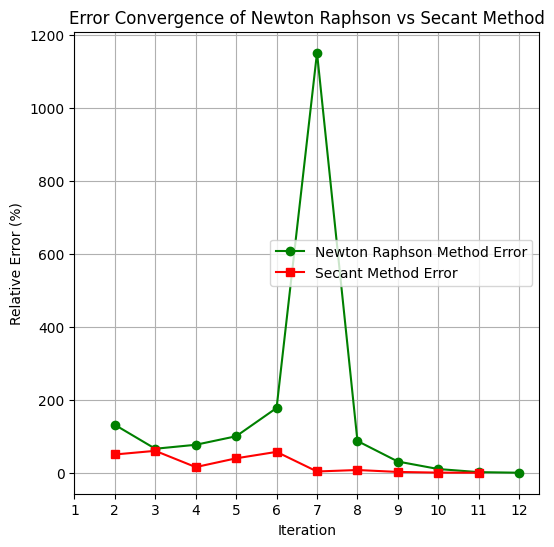

In [7]:




def newton():

  function = sp.sympify(input("Enter a function: "))
  init_guess = float(input("Enter intial guess: "))
  accepted_error = float(input("Enter the acceptable relative error: "))
  max_iter = int(input("Enter max iteration:"))

  X_curr = init_guess
  X_prev = None
  iterations = 0
  print(f"Finding root of {function} with Newton Raphson Method")
  result = []
  while iterations <= max_iter:
    Fx = solveFunction(function, X_curr)
    FpX = solveFunction(getDerivative(function), X_curr)
    error = relative_error(X_curr, X_prev)
    result.append([iterations, round(X_curr, 6), round(Fx, 6), round(FpX, 6), round(error, 6) if X_prev is not None else error])
    if X_prev is not None and error < accepted_error:
      break
    X_prev = X_curr
    X_curr = X_curr - (Fx / FpX)
    iterations += 1

  return result

def solveSecant(func, X_prev, X_curr):
  return X_curr - ((solveFunction(func, X_curr) * (X_prev - X_curr)) / (solveFunction(func, X_prev) - solveFunction(func, X_curr)))

def secant():
  function = sp.sympify(input("Enter a function: "))
  init_guess = float(input("Enter intial guess: "))
  another_guess = float(input("Enter another guess: "))
  accepted_error = float(input("Enter the acceptable relative error: "))
  max_iter = int(input("Enter max iteration:"))

  print(f"Finding root of {function} with Secant Method")
  result = []
  X_prev = init_guess
  X_curr = another_guess
  X_next = None
  iterations = 1
  result.append([-1, X_prev, solveFunction(function, X_prev), "----"])
  result.append([-1, X_curr, solveFunction(function, X_curr), relative_error(X_curr, X_prev)])

  while iterations <= max_iter:

    X_next = solveSecant(function, X_prev, X_curr)
    Fx = solveFunction(function, X_next)
    error = relative_error(X_next, X_curr)
    result.append([iterations, X_next, Fx, error])
    if error < accepted_error:
      break
    iterations += 1
    X_prev = X_curr
    X_curr = X_next
  return result







if __name__ == "__main__":
  newton_data  = newton()
  newton_errors = [row[-1] for row in newton_data]

  print(tabulate(newton_data, headers=["n", "Xn", "F(x)", "F'(x)", "Ea"], tablefmt="grid"))
  print("The root approximation is: ", newton_data[-1][1])
  print("\n\n")

  secant_data  = secant()
  secant_errors = [row[-1] for row in secant_data]

  print(tabulate(secant_data, headers=["n", "Xn", "F(x)", "F'(x)", "Ea"], tablefmt="grid"))
  print("The root approximation is: ",secant_data[-1][1])
  print("\n\n")

  graph(newton_errors, secant_errors)



# x^3-5*x^2+6*x-2
# 2.5 newton
# 2 , 4 secant



